# Predict Hotel Reservation Cancelation with Machine Learning

## This project is for Final Project on Purwadhika Data Science Course

Data set is from https://www.kaggle.com/jessemostipak/hotel-booking-demand

It consist of 31 independent variable (categorical and numerical) and 1 dependent variable ('is_canceled' -> 0 = not cancel, 1 = cancel)

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

The description of all feature can be read on https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## __Open Dataset__

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## __1. Data Cleaning__

### __a. Checking and Handling Missing Values__

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Terdapat 4 fitur yang memiliki data yang hilang, yaitu:** ``children``, ``country``, ``agent``, ``company``

In [5]:
for i in df.columns:
    print(i, df[i].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

__Jika melihat pada hasil di atas, fitur 'meal', 'market_segment', 'distribution_channel' memiliki value string 'Undefined'.__

#### Handling Missing and 'Undefined' Value

In [6]:
# Fitur 'children'
df['children'] = df['children'].dropna()

Pada fitur 'children' data yang kosong dapat dihapus karena hanya 4 data saja yang hilang, jadi kita tidak kehilangan data yang banyak

In [7]:
# Fitur 'country'
print(df['country'].mode())

0    PRT
dtype: object


In [8]:
df['country'].fillna('PRT', inplace=True)

Pada fitur 'country' data yang kosong di isi dengan modus dari data 'country'

In [9]:
# Fitur 'agent'
df['agent'].fillna(999, inplace=True)

# Fitur 'company'
df['company'].fillna(999, inplace=True)

Berdasarkan keterangan fitur-fitur dari dataset yang ada di: https://www.sciencedirect.com/science/article/pii/S2352340918315191. Fitur 'agent' yang memiliki data kosong kemungkinan besar reservasinya dilakukan langsung oleh customer sendiri, tanpa melalu agent. Hal ini sama juga tejadi pada fitur 'company'. Jadi kedua fitur tersebut diisi dengan angka 999, sebagai tanda dilakukan resevasi oleh customer sendiri. 

In [10]:
# Fitur 'meal'
df['meal'] = df['meal'].replace(['Undefined'], 'SC')

Berdasarkan keterangan fitur-fitur dari dataset yang ada di: https://www.sciencedirect.com/science/article/pii/S2352340918315191. Value 'Undefined' memiliki kesamaan definisi dengan value 'SC' yaitu no meal package, sehingga value 'Undefined' diubah menjadi 'SC'

In [11]:
# Fitur 'market_segment' dan 'distribution_channel'
print(len(df[df['market_segment']=='Undefined']))
print(len(df[df['distribution_channel']=='Undefined']))

2
5


In [12]:
df = df.drop(df[df['market_segment']=='Undefined'].index)

In [13]:
df = df.drop(df[df['distribution_channel']=='Undefined'].index)

Pada fitur 'market_segment' dan 'distribution_channel' data 'Undefined' didrop karna hanya sedikit, jadi kita tidak kehilangan banyak data.

In [14]:
df.shape

(119385, 32)

### __B. Checking and Handling Wrong Values__

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119385.0,0.370398,0.482913,0.00,0.00,0.00,1.0,1.0
lead_time,119385.0,104.014809,106.863734,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119385.0,2016.156603,0.707451,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119385.0,27.164996,13.605391,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119385.0,15.798643,8.780765,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119385.0,0.927596,0.998618,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119385.0,2.500306,1.908296,0.00,1.00,2.00,3.0,50.0
adults,119385.0,1.856389,0.579263,0.00,2.00,2.00,2.0,55.0
children,119385.0,0.103882,0.398555,0.00,0.00,0.00,0.0,10.0
babies,119385.0,0.007949,0.097438,0.00,0.00,0.00,0.0,10.0


Fitur 'ADR' adalah Average Daily Rates / Rata-rata harga kamar per harinya. Jika melihat tabel Describe di atas, nilai min pada fitur ADR termasuk yang tidak normal karena memiliki nilai negatif. Oleh karena itu nilai negatif tersebut tidak akan digunakan atau akan di drop.

In [16]:
df['adr'].describe().T

count    119385.000000
mean        101.833450
std          50.534866
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [17]:
df = df[df['adr'] > 0]

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,117425.0,0.374767,0.484065,0.00,0.00,0.0,1.0,1.0
lead_time,117425.0,105.087835,106.907626,0.00,19.00,71.0,162.0,709.0
arrival_date_year,117425.0,2016.160324,0.706539,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,117425.0,27.136598,13.575936,1.00,16.00,27.0,38.0,53.0
arrival_date_day_of_month,117425.0,15.803228,8.783516,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,117425.0,0.936419,0.995764,0.00,0.00,1.0,2.0,19.0
stays_in_week_nights,117425.0,2.521226,1.893752,0.00,1.00,2.0,3.0,50.0
adults,117425.0,1.860617,0.482100,0.00,2.00,2.0,2.0,4.0
children,117425.0,0.104501,0.399689,0.00,0.00,0.0,0.0,10.0
babies,117425.0,0.007869,0.097170,0.00,0.00,0.0,0.0,10.0


**Beberapa row pada dataset ini memiliki data tamu 0 (adults = 0, children = 0, babies = 0). Row tersebut merupakan data yang salah. Perlu dilihat ada berapa banyak row yang memiliki data seperti itu.**

In [19]:
len(df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)])

31

Row yang memiliki tamu 0 hanya berjumlah 31, kita dapat menghapus row tersebut.

In [20]:
tamu_0 = list(df.loc[df["adults"] + df["children"] + df["babies"]==0].index)

df.drop(df.index[tamu_0], inplace=True)

In [21]:
df.shape

(117394, 32)

### __C. Checking and Handling Outlier__

In [22]:
def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

Untuk data numerical, perlu dilihat apakah data tersebut termasuk outlier atau bukan. Fungsi di atas berguna untuk mendeteksi adanya outlier dengan menggunakan metode IQR. 

Kolom yang dideteksi outlier yaitu : 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
        'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
        'required_car_parking_spaces', 'total_of_special_requests'

In [23]:
numerical = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
        'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
        'required_car_parking_spaces', 'total_of_special_requests']

for i in numerical:
    print(f'{i}, {len(find_outlier(df[i]))}')

lead_time, 2960
stays_in_weekend_nights, 255
stays_in_week_nights, 3319
adults, 28641
children, 8492
babies, 892
previous_cancellations, 6392
previous_bookings_not_canceled, 3343
booking_changes, 17522
days_in_waiting_list, 3665
adr, 4047
required_car_parking_spaces, 7304
total_of_special_requests, 2800


Setelah dilakukan deteksi outlier, kolom-kolom di atas memiliki outlier yang jumlahnya banyak. Jika kita melakukan penghapusan pada data outlier kita akan kehilangan banyak data atau informasi, maka perlakuan yang bisa dilakukan yaitu scalling data.

## __2. Exploratory Data Analysis__

Pada tahap EDA saya mengambil beberapa fitur yang mempengaruhi terhadap pembatalan pesanan

In [24]:
plt.style.use('seaborn')

### __A. Bookings by Month__

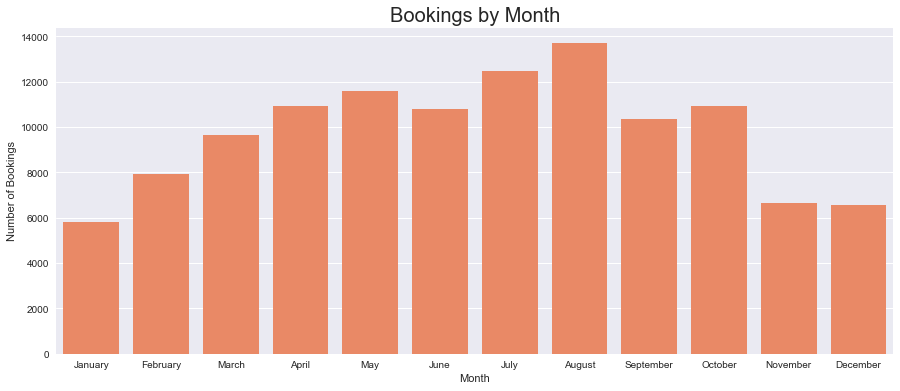

In [25]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,6))
sns.countplot(data=df, x ='arrival_date_month', color='coral', order=month_sorted)
plt.title('Bookings by Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.show()

Grafik ini menunjukan pesanan hotel per bulannya. High season terjadi pada saat musim panas, sedangkan pada musim dingin mengalami penurunan pesanan hotel yang masuk. 

**Business insight:** Manajemen hotel dapat meningkatkan promosi pada saat musim dingin untuk mendapatkan tamu yang lebih banyak. Salah satunya dengan memberikan potongan harga atau paket-paket menginap yang spesial. Hal ini perlu dipertimbangkan mengingat musim dingin yang terjadi pada akhir tahun termasuk holiday season karena terdapat libur natal dan tahun baru.

Kita perlu melihat bulan mana yang memiliki persentasi tertinggi dalam pembatalan pesanan.

### __B. Percentage of Cancelation by Month__

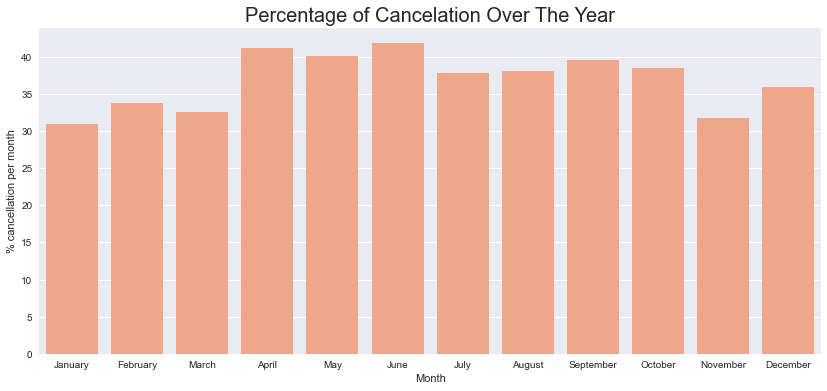

In [26]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

monthly_cancel_percent = pd.DataFrame(df[df['is_canceled'] == 1]['arrival_date_month'].value_counts() * 100 / df['arrival_date_month'].value_counts())
monthly_cancel_percent.reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x=monthly_cancel_percent.index, y='arrival_date_month',data=monthly_cancel_percent, order=month_sorted, color='lightsalmon')
plt.title('Percentage of Cancelation Over The Year', size=20)
plt.ylabel('% cancellation per month')
plt.xlabel('Month')


plt.show()

Dari grafik di atas terlihat perbedaan yang tidak terlalu signifikan tiap bulannya. Pada high season memiliki persentasi cancel yang tinggi, dan untuk low season persentasi cancelnya lebih rendah. Pihak hotel perlu membuat strategi untuk mengantisipasi banyaknya pembatalan saat pesanan hotel masuk banyak.

### __C. Repeated Guests vs Cancelation__

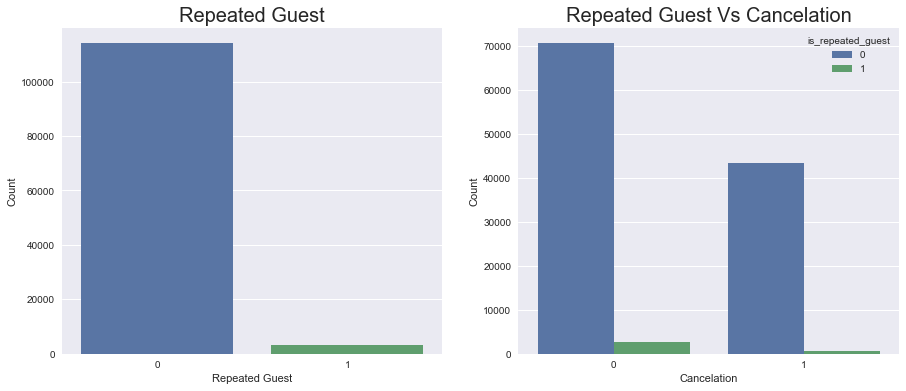

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'is_repeated_guest')
plt.title('Repeated Guest', fontsize = 20)
plt.xlabel('Repeated Guest')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'is_canceled', hue = 'is_repeated_guest')
plt.title('Repeated Guest Vs Cancelation', fontsize = 20)
plt.xlabel('Cancelation')
plt.ylabel('Count')

plt.show()

- Grafik Repeated Guest menunjukan sebagian besar tamu yang melakukan pemesanan kamar adalah tamu baru untuk hotel. 
- Jika melihat grafik repeated guest vs cancelation, pembatalan pesanan yang dilakukan oleh tamu yang pernah menginap di hotel lebih sedikit dibandingkan tamu yang baru.

**Business Insight:** Perlu adanya penetrasi marketing kepada tamu yang sudah pernah menginap apalagi kemungkinan pembatalan oleh tamu yang pernah menginap sangat kecil.

### __D. Arriving Year, Lead Time and Cancelation__

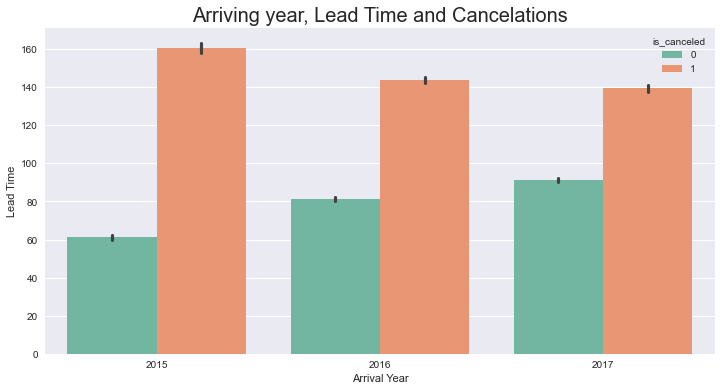

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='Set2')
plt.title('Arriving year, Lead Time and Cancelations', size=20)
plt.xlabel('Arrival Year')
plt.ylabel('Lead Time')


plt.show()

Berdasarkan grafik di atas pesanan yang lead time-nya di bawah 90 hari memiliki peluang lebih kecil untuk dibatalkan daripada pesanan yang lead time-nya di atas 90 hari.

**Business Insight:** Manajemen hotel bisa membuat kebijakan dengan melakukan kewajiban deposit untuk pesanan yang dilakukan dari jauh-jauh hari. Apabila terjadi pembatalan, deposit tersebut bisa menjadi milik hotel, sehingga hotel tidak terlalu rugi atas pembatalan pesanan tersebut.

### __E. Deposit Type vs Cancelation__

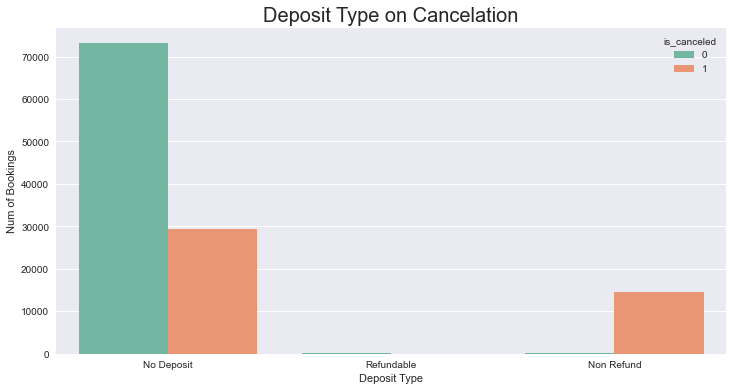

In [29]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df, x = 'deposit_type',hue='is_canceled', palette='Set2')
plt.title('Deposit Type on Cancelation', size=20)
plt.xlabel('Deposit Type')
plt.ylabel('Num of Bookings')

plt.show()

Grafik jumlah cancelation berdasarkan tipe menunjukkan sebagian besar pesanan tidak memerlukan deposit. Pembatalan pesanan terjadi paling banyak pada pesanan yang tidak ada depositnya, dilihat dari jumlahnya (+- 30,000) ini sangat merugikan untuk pihak hotel. Hal yang menarik dari grafik di atas ada pada tipe deposit refundable. Jumlah pembatalan pesanan di tipe ini sangat sedikit jika dibandingkan dengan tipe non refund. Tipe pesanan refundable memberikan customer kemudahan untuk melakukan pembatalan, tetapi pada data ini tidak terjadi.

**Business Insight:** Pihak hotel perlu meninjau untuk melakukan kebijakan pesanan yang mewajibkan adanya deposit. Tidak adanya deposit dapat mempengaruhi pembatalan dalam pesanan kamar oleh customer.

### __F. Costumer Type__

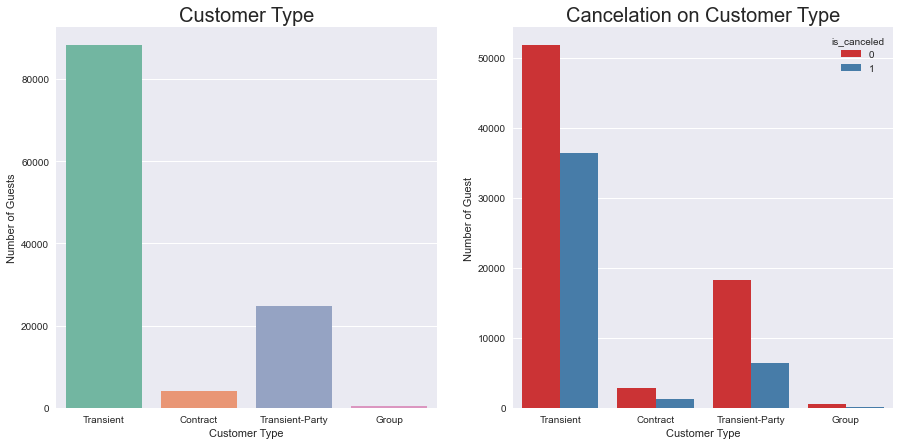

In [30]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'customer_type', palette='Set2')
plt.title('Customer Type', size=20)
plt.xlabel('Customer Type')
plt.ylabel('Number of Guests')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'customer_type', hue='is_canceled', palette='Set1')
plt.title('Cancelation on Customer Type', size=20)
plt.xlabel('Customer Type')
plt.ylabel('Number of Guest')

plt.show()

Menurut https://www.xotels.com/en/glossary/transient/ , Tamu hotel dibagi ke dalam 2 kategori yaitu Grup dan Non grup. Di dalam kategori non group diantaranya adalah transient, yaitu tamu yang sedang berlibur atau berpergian yang mencari penginapan dengan waktu singkat ataupun dalam keadaan 'urgent'.

Untuk tipe Transient Party, berdasarkan keterangan https://www.sciencedirect.com/science/article/pii/S2352340918315191 , Transient party adalah pesanan dari tamu yang berasosiasi dengan tamu transient lainnya, contoh Keluarga yang ingin memesan beberapa kamar. 

Grafik pertama menunjukan customer yang datang ke hotel sebagian besar adalah tipe Transient. Untuk tipe Group dan Contract jumlahnya sedikit. Grafik kedua adalah pembatalan pesanan pada tiap jenis customer. Customer jenis transient paling banyak melakukan pembatalan dibandingkan dengan Group dan Contract.

**Business Insight:** Manajemen hotel dapat melakukan promosi lebih pada tipe customer Group dan Contract mengingat ratio pembatalan pesanannya lebih kecil dibandingkan dengan customer Transient. Customer Group menginginkan jumlah kamar yang banyak sehingga pihak hotel dapat memberikan promo harga. Untuk customer contract, pihak hotel bisa menjalin kerjasama dengan beberapa company jika ingin melakukan acara-acara pertemuan.

## __3. Model Building__

### __a. Feature Selection__

Pada tahap ini akan dilakukan seleksi pada masing-masing fitur untuk melihat mana fitur yang penting untuk digunakan atau sebaliknya.

### Correlation Matrix
Untuk melakukan metode ini fitur-fitur categorical yang ada pada dataset ini perlu diubah menjadi sebuah angka. Alat yang akan digunakan yaitu `LabelEncoder`

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
df_le = df.copy()

In [33]:
df_le.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [34]:
categorical = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 
               'reserved_room_type', 'assigned_room_type', 'deposit_type',
               'agent', 'company', 'customer_type', 'reservation_status']

le = LabelEncoder()

for i in categorical:
    df_le[i] = le.fit_transform(df_le[i])

In [35]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_le['arrival_date_month'] = df_le['arrival_date_month'].map(month_dict)

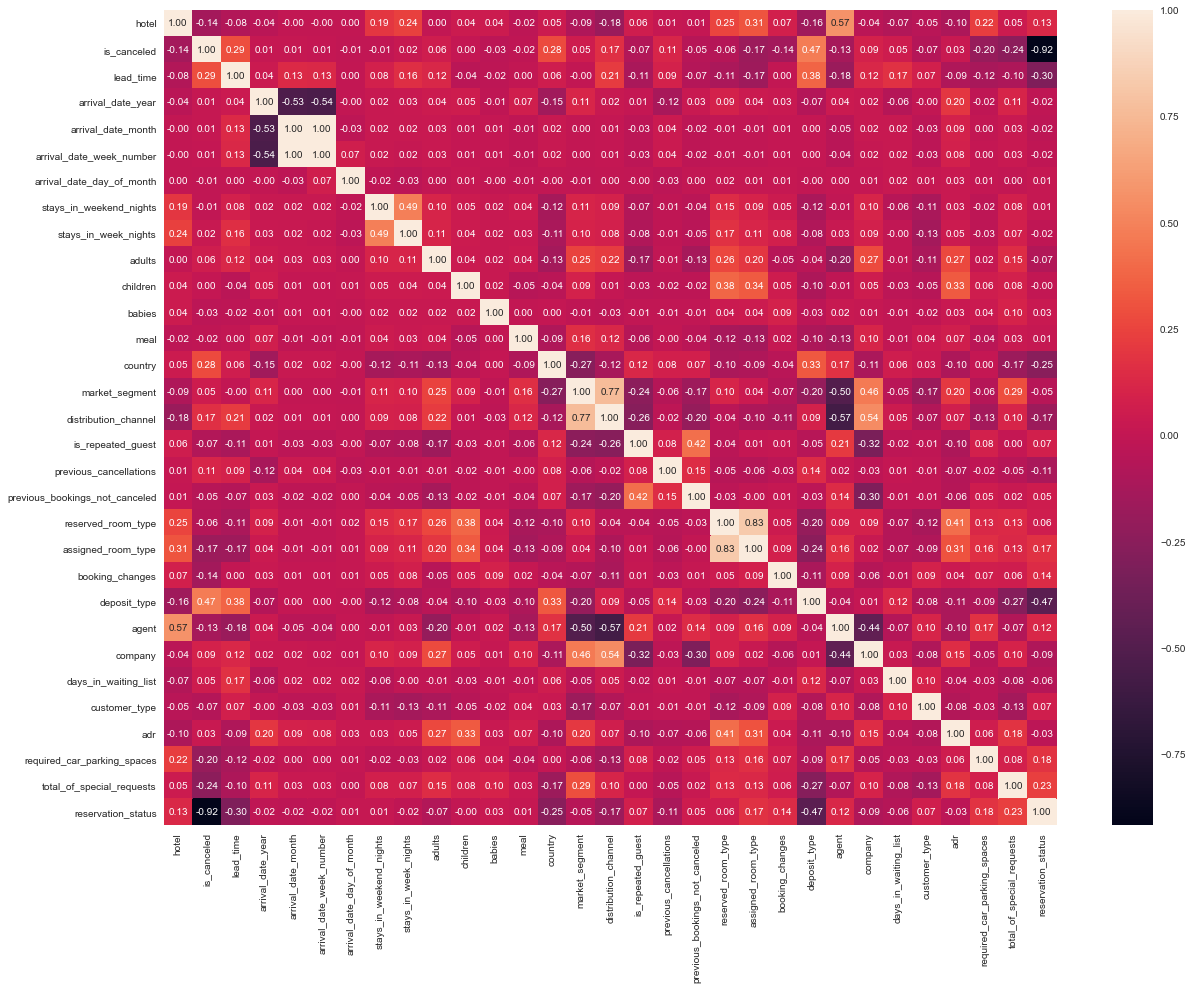

In [36]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f')
plt.savefig('correlationmatrix.png')

plt.show()

Pada matriks korelasi di atas, fitur yang berkorelasi cukup tinggi terhadap target (is_canceled) yaitu `lead_time`, `country`, dan `deposit_type`. Ada fitur yang memiliki korelasi negatif yang sangat tinggi terhadap target yaitu `reservation_status`. Fitur tersebut dapat kita drop. Fitur reservation `reservation_status` memilki hubungan dengan fitur `reservation_status_date`, jadi fitur ini juga kita drop.

In [37]:
df_le = df_le.drop(['reservation_status', 'reservation_status_date'], axis=1)

Langkah selanjutnya yaitu feature selection menggunakan SelectKBest dengan score function Chi2 dan F_classif. 

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

**Chi2 on Categorical Feature**

In [38]:
categorical = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 
               'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
               'agent', 'company', 'customer_type']

In [39]:
x_cat = df_le[categorical]
y_cat = df_le['is_canceled']

In [40]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x_cat,y_cat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_cat.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 8 best features

                   Specs          Score
13                 agent  252223.390513
6                country  192604.553623
12          deposit_type   23060.223792
11    assigned_room_type    9066.588513
14               company    8484.699670
0                  hotel    1482.667487
10    reserved_room_type    1324.291379
8   distribution_channel     996.404377


**ANOVA on Numerical Feature**

In [41]:
numerical

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [42]:
x_num = df_le[numerical]
y_num = df_le['is_canceled']

In [43]:
bestfeatures = SelectKBest(score_func=f_classif, k=6)
fit = bestfeatures.fit(x_num,y_num)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_num.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 6 best features

                          Specs         Score
0                     lead_time  10824.912231
12    total_of_special_requests   7008.632359
11  required_car_parking_spaces   4764.905706
8               booking_changes   2514.818055
6        previous_cancellations   1455.710888
3                        adults    381.619208


In [44]:
top_feature = ['is_canceled', 'lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes',
        'previous_cancellations', 'adults', 'agent', 'country', 'deposit_type', 'assigned_room_type', 
       'company', 'hotel', 'reserved_room_type', 'distribution_channel']

In [45]:
df_top = df_le[top_feature]
df_top.head()

,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,adults,agent,country,deposit_type,assigned_room_type,company,hotel,reserved_room_type,distribution_channel
2,0,7,0,0,0,0,1,332,59,0,2,343,1,0,1
3,0,13,0,0,0,0,1,219,59,0,0,343,1,0,0
4,0,14,1,0,0,0,2,173,59,0,0,343,1,0,3
5,0,14,1,0,0,0,2,173,59,0,0,343,1,0,3
6,0,0,0,0,0,0,2,332,135,0,2,343,1,2,1


**Pada bagian checking outlier, kolom numerical pada data ini memiliki data outlier. Data tersebut akan discalling dengan `RobustScaller`. Jadi saat pembuatan model akan dilakukan 2 percobaan antara data non scalling dengan data yang discalling.**

In [46]:
df_scalled = df_top.copy()

In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
kolom = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes', 'previous_cancellations', 'adults']

for i in kolom:
    df_scalled[i] = RobustScaler().fit_transform(df_scalled[[i]])

In [49]:
df_scalled.head()

,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,adults,agent,country,deposit_type,assigned_room_type,company,hotel,reserved_room_type,distribution_channel
2,0,-0.447552,0.0,0.0,0.0,0.0,-1.0,332,59,0,2,343,1,0,1
3,0,-0.405594,0.0,0.0,0.0,0.0,-1.0,219,59,0,0,343,1,0,0
4,0,-0.398601,1.0,0.0,0.0,0.0,0.0,173,59,0,0,343,1,0,3
5,0,-0.398601,1.0,0.0,0.0,0.0,0.0,173,59,0,0,343,1,0,3
6,0,-0.496503,0.0,0.0,0.0,0.0,0.0,332,135,0,2,343,1,2,1


### __b. Splitting Data__

Melakukan spliting data menjadi data train dan data test.

In [50]:
from sklearn.model_selection import train_test_split

**Splitting Data Non Scalling**

In [51]:
y = df_top['is_canceled']
X = df_top.drop(['is_canceled'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

**Splitting Data Scalling**

In [53]:
y_scl = df_scalled['is_canceled']
X_scl = df_scalled.drop(['is_canceled'], axis=1)

In [54]:
X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(X_scl, y_scl, test_size=0.1, random_state=0)

### __c. Model__

- Model yang akan digunakan ada 3 model yaitu `LogisticRegression`, `DecisionTreeClassifier`, dan  `RandomForestClassifier`

- Untuk melihat mana model yang memberikan performa yang bagus, akan dilakukan Evaluation Metric, di antaranya classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

- Setelah ditentukan mana model yang bagus performanya, akan dilakukan Hyperparameter Tuning untuk meningkatkan performa model tersebut

In [62]:
# import model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import evaluation metric
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

**Model on Data Non Scalling**

In [56]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decission Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**Model on Data Scalling**

In [57]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scl, y_train_scl)
y_pred_lr_scl = lr.predict(X_test_scl)

# Decission Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scl, y_train_scl)
y_pred_dt_scl = dt.predict(X_test_scl)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scl, y_train_scl)
y_pred_rf_scl = rf.predict(X_test_scl)

In [58]:
accuracy = [accuracy_score(y_test, y_pred_lr)*100, accuracy_score(y_test, y_pred_dt)*100, accuracy_score(y_test, y_pred_rf)*100,
           accuracy_score(y_test_scl, y_pred_lr_scl)*100, accuracy_score(y_test_scl, y_pred_dt_scl)*100, accuracy_score(y_test_scl, y_pred_rf_scl)*100]

recall = [recall_score(y_test, y_pred_lr)*100, recall_score(y_test, y_pred_dt)*100, recall_score(y_test, y_pred_rf)*100,
         recall_score(y_test_scl, y_pred_lr_scl)*100, recall_score(y_test_scl, y_pred_dt_scl)*100, recall_score(y_test_scl, y_pred_rf_scl)*100]

precision = [precision_score(y_test, y_pred_lr)*100, precision_score(y_test, y_pred_dt)*100, precision_score(y_test, y_pred_rf)*100,
            precision_score(y_test_scl, y_pred_lr_scl)*100, precision_score(y_test_scl, y_pred_dt_scl)*100, precision_score(y_test_scl, y_pred_rf_scl)*100]

roc_auc_score = [roc_auc_score(y_test, y_pred_lr)*100, roc_auc_score(y_test, y_pred_dt)*100, roc_auc_score(y_test, y_pred_rf)*100,
                roc_auc_score(y_test_scl, y_pred_lr_scl)*100, roc_auc_score(y_test_scl, y_pred_dt_scl)*100, roc_auc_score(y_test_scl, y_pred_rf_scl)*100]

f1_score = [f1_score(y_test, y_pred_lr)*100, f1_score(y_test, y_pred_dt)*100, f1_score(y_test, y_pred_rf)*100,
           f1_score(y_test_scl, y_pred_lr_scl)*100, f1_score(y_test_scl, y_pred_dt_scl)*100, f1_score(y_test_scl, y_pred_rf_scl)*100]

df_score = pd.DataFrame(data = [accuracy, recall, precision, roc_auc_score, f1_score],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LogReg Scalled', 'DecisionTree Scalled', 'RandomForest Scalled']
            )
df_score

,Logistic Regression,Decision Tree,Random Forest,LogReg Scalled,DecisionTree Scalled,RandomForest Scalled
accuracy,76.609881,85.034072,86.413969,76.516184,84.923339,86.371380
recall,50.619230,78.090520,78.901148,50.506643,78.248142,78.923666
precision,80.257051,81.561618,84.190293,80.049964,81.210563,84.072919
roc_auc_score,71.521425,83.674661,84.943107,71.424030,83.616467,84.913265
f1 score,62.082298,79.788335,81.459956,61.935662,79.701835,81.416957


Pada dataframe di atas, model Random Forest meiliki performa metric score yang lebih baik dari pada model lain. Perlakuan scalling memang memberikan perubahan pada score metricnya dibanding dengan data yang tidak discalling. Namun perbedaan scorenya sangatlah kecil. Untuk langkah selanjutnya saya memilih model dengan data yang tidak discalling. Hal ini dikarenakan untuk memudahkan dalam input user saat model dideploy di dashboard flask nanti.

### __d. Hyperparameter Tuning using Grid Search__

In [59]:
from sklearn.model_selection import GridSearchCV

In [81]:
# parameter model RandomForest yang akan dituning dan value di setiap parameter

max_depth = [20,50,100]
min_samples_split = [2,5,10]
n_estimators = [100, 500, 1000]

# simpan dalam variabel
param = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'n_estimators':n_estimators}
param

{'max_depth': [20, 50, 100],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 500, 1000]}

In [82]:
model_RF = RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv=5)

In [103]:
model_RF_GS.fit(X_train, y_train)
model_RF_GS.best_params_

{'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 100}

#### Model After Tuning

In [60]:
rf_model = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_depth=100)
rf_model.fit(X_train, y_train)
y_pred_opt = rf_model.predict(X_test)

In [63]:
accuracy2 = [accuracy_score(y_test, y_pred_rf)*100, accuracy_score(y_test, y_pred_opt)*100]
recall2 = [recall_score(y_test, y_pred_rf)*100, recall_score(y_test, y_pred_opt)*100]
precision2 = [precision_score(y_test, y_pred_rf)*100, precision_score(y_test, y_pred_opt)*100]
roc_auc_score2 = [roc_auc_score(y_test, y_pred_rf)*100, roc_auc_score(y_test, y_pred_opt)*100]
f1_score2 = [f1_score(y_test, y_pred_rf)*100, f1_score(y_test, y_pred_opt)*100]

In [64]:
df_score2 = pd.DataFrame(data = [accuracy2, recall2, precision2, roc_auc_score2, f1_score2],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['RF Before Tuning', 'RF After Tuning']
            )
df_score2['Increment (%)'] = df_score2['RF After Tuning'] - df_score2['RF Before Tuning']
df_score2

,RF Before Tuning,RF After Tuning,Increment (%)
accuracy,86.413969,86.439523,0.025554
recall,78.901148,79.238910,0.337762
precision,84.190293,84.005729,-0.184564
roc_auc_score,84.943107,85.029785,0.086678
f1 score,81.459956,81.552723,0.092767


Jika melihat tabel di atas, model RF yang telah di-tuning metric score nya meningkat dibandingkan dengan yang belum di-tuning, hanya pada metric precision saja yang menurun sekitar 0.184564%. Angka peningkatan metric yang terjadi memang tidak terlalu signifikan, tetapi pada metric recall peningkatan scorenya termasuk yang paling tinggi di antara metric yang lain yaitu sebesar 0.337762%

Berdasarkan tabel di atas model yang akan digunakan pada project ini adalah **model Random Forest dengan data non scalling yang telah di-tuning.**

### __e. Model Evaluation__

Evaluation Metric Score
               Score (%)
accuracy       86.439523
recall         79.238910
precision      84.005729
roc_auc_score  85.029785
f1 Score       81.552723


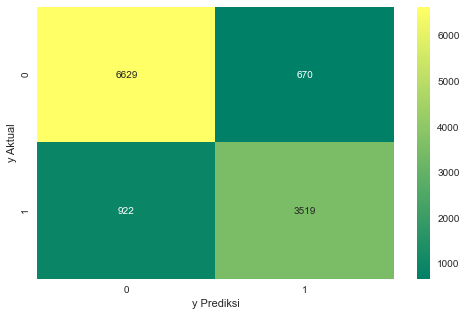

TN = 6629 FP = 670 FN = 922 TP = 3519


In [65]:
print('Evaluation Metric Score')
print(pd.DataFrame(data= [accuracy_score(y_test, y_pred_opt)*100, recall_score(y_test, y_pred_opt)*100,
                   precision_score(y_test, y_pred_opt)*100, roc_auc_score(y_test, y_pred_opt)*100,
                   f1_score(y_test, y_pred_opt)*100],
            index= ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 Score'],
            columns = ['Score (%)']))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_opt), annot=True, fmt='.0f', ax=ax, cmap='summer')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()
print('TN =', tn, 'FP =', fp, "FN =", fn, "TP =", tp)

Pada tabel Evaluation Metric Score, model yang kita buat sudah memberikan nilai yang cukup baik untuk kita gunakan. Evaluation metric yang perlu diperhatikan pada model ini yaitu Recall Positive dan Precision Negatif.

1. __Recall Positive__: 79.2%
- Recall Positive pada data booking hotel ini adalah proporsi jumlah data yang diprediksi batal dari semua data yang benar (aktual) batal. Tujuan dari project ini yaitu untuk mendapatkan sebanyak mungkin prediksi positif (batal) dan recall positive mendukung hal tersebut.

2. __Precision Negative__: 87.8%
- Precision Negative pada data booking hotel ini adalah jumlah data benar yang diprediksi tidak batal dari semua data yang yang diprediksi tidak batal. Evaluation metric ini mendukung kita untuk mendapatkan ketepatan yang tinggi pada prediksi yang kita buat.

Kedua evaluation metric di atas nilainya dipengaruhi oleh jenis kesalahan False negatif (FN). Kesalahan ini terjadi ketika model machine learning memprediksi suatu pesanan yang tidak cancel (tamu datang) tetapi kejadian aktualnya cancel (tamu tidak datang). Kesalahan FN dapat merugikan pihak hotel. Dalam praktiknya, ketika tamu hotel akan datang untuk menginap, pihak hotel telah menyiapkan beberapa hal; seperti menyiapkan kamar yang akan dipakai, memberikan makanan dan minuman (welcoming drinks) saat tamu sampai di hotel, ataupun pihak hotel melakukan penjemputan tamu di bandara atau terminal. 

Ketika tamu hotel ternyata tidak jadi datang, pihak hotel sangat dirugikan dengan hal tersebut. Tamu yang datang seharusnya memberikan pendapatan untuk hotel, tetapi jika yang terjadi adalah kebalikannya, pihak hotel tidak mendapatkan apapun. Kerugian pendapatan dan waktu adalah kerugian yang di alami oleh pihak hotel. Selain itu juga, manajemen hotel kehilangan kesempatan untuk melakukan penerimaan pesanan dari tamu yang lain, karena biasanya saat kamar sudah dibooking dan pihak hotel sudah yakin dengan tamu yang akan datang, pihak hotel akan menolak pesanan dari customer yang lain. Ketika kita dapat mengurangi jenis kesalahan FN, pihak hotel mendapatkan untung dari hal tersebut. Rumus untuk menghitung Recall Positive adalah TP/(TP + FN), sedangkan untuk Precision Negative rumusnya TN/(TN + FN). Sehingga jika nilai FN itu kecil, nilai Recall Positive dan Precision Negatifnya akan semakin besar.

### __f. Saving Model__

Saving model using Joblib

In [66]:
import joblib

In [67]:
joblib.dump(rf_model, 'model_joblib')

['model_joblib']